<a href="https://colab.research.google.com/github/ChrisMath26/AAyCD/blob/main/Clasifiaci%C3%B3n/SVC_vs_LR_1_Cuaderno_N%C2%B03_AAyCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[Aprendizaje Automático y Ciencia De Datos]**
**Cuaderno N°3 Proyecto AAyCD.**

**Autor:** Christian Camilo Trillera Mota\
**Estudiante:** Maestría en Ciencias - Estadística

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR, SVC
import seaborn as sns

In [ ]:
df = pd.read_csv('data_sup.csv', encoding='UTF-8-SIG')
df

,DEPARTAMENTO,MUNICIPIO,AREA_NACIMIENTO,LOCALIDAD_NACIMIENTO,SIT_PARTO,NOM_INST,SEXO,PESO_GRAMOS,PESO,TALLA_CENTIMETROS,...,NUM_HIJOS_NACIDOS_VIVOS_categoria,NUM_EMBARAZOS_categoria,EDAD_PADRE_categoria,APGAR1_GRUPO,SEXO_GRUPO,PESO_GRUPO,TIPO_PARTO_GRUPO,EDAD_REPRODUCTIVA_GRUPO,NIVEL_EDUCATIVO_GRUPO,ESTADO_CONYUGAL_GRUPO
0,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,FUNDACION SANTA FE DE BOGOTA,1.MASCULINO,2555,4.DEFICIT(2500_2999),48,...,T,T,T,APGAR Bajo,Masculino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Casada
1,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Teusaquillo,1.INSTITUCION DE SALUD,CLINICA PALERMO -CONG HNAS DOMINICAS,1.MASCULINO,2915,4.DEFICIT(2500_2999),51,...,T,AS,T,APGAR Normal,Masculino,Déficit,Espontáneo,Edad reproductiva atípica,Alto nivel educativo,unión libre
2,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,CENTRO DE ATENCION EN SALUD CAFAM CLINICA SANT...,1.MASCULINO,2615,4.DEFICIT(2500_2999),47,...,T,T,T,APGAR Bajo,Masculino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,unión libre
3,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Ciudad Bolívar,1.INSTITUCION DE SALUD,UNIDAD DE SERVICIOS DE SALUD MEISEN,1.MASCULINO,2525,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Normal,Masculino,Déficit,Espontáneo,Edad reproductiva típica,Bajo nivel educativo,Soltera
4,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),San Cristóbal,1.INSTITUCION DE SALUD,HOSPITAL UNIVERSITARIO CLINICA SAN RAFAEL,2.FEMENINO,2000,3.BAJO(1500_2499),44,...,AS,AS,T,APGAR Bajo,Femenino,Peso bajo,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Soltera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60203,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Teusaquillo,1.INSTITUCION DE SALUD,CLINICA MAGDALENA,1.MASCULINO,3075,5.NORMAL(3000_4199),53,...,T,T,T,APGAR Bajo,Masculino,Peso Normal,Espontáneo,Edad reproductiva típica,Alto nivel educativo,Casada
60204,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Los Mártires,1.INSTITUCION DE SALUD,HOSPITAL UNIVERSITARIO MAYOR-MEDERI,2.FEMENINO,2940,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Normal,Femenino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Soltera
60205,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Suba,1.INSTITUCION DE SALUD,UNIDAD DE SERVICIOS DE SALUD CENTRO DE SERVICI...,2.FEMENINO,3150,5.NORMAL(3000_4199),48,...,T,T,T,APGAR Normal,Femenino,Peso Normal,No Espontáneo,Edad reproductiva típica,Nivel educativo medio,Soltera
60206,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,CENTRO DE ATENCION EN SALUD CAFAM CLINICA SANT...,2.FEMENINO,2980,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Bajo,Femenino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,unión libre


In [ ]:
# Filtrar filas donde GESTACION no sea "Sin Informacion"
df = df[df['GESTACION'] != "Sin Informacion"].copy()
# Reasignar valores a la nueva columna 'GESTACION_GRUPO'
df['GESTACION_GRUPO'] = df['GESTACION'].replace({
    "1.Pretermino(<37)": "pretermino",
    "2.A termino(37 - 42)": "A término"
})

In [ ]:
# Seleccionar solo las variables numéricas para PCA
variables_numericas = [
    "PESO_GRAMOS", "TALLA_CENTIMETROS", "TIEMPO_GESTACION",
    "NUM_CONSULTAS_PRENAT", "EDAD_MADRE",
    "NUM_HIJOS_NACIDOS_VIVOS", "NUM_EMBARAZOS", "EDAD_PADRE"
]
variables_categoricas = ['TIPO_PARTO_GRUPO', 'SEXO_GRUPO', 'GESTACION_GRUPO', 'EDAD_REPRODUCTIVA_GRUPO']
y = df['APGAR1_GRUPO']

In [ ]:
y = y.astype('category').cat.codes  # Convierte las categorías a números

In [ ]:
df_categorico = df[variables_categoricas].dropna()
df_numerico = df[variables_numericas].dropna()

In [ ]:
#ACP normado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)
pca = PCA(n_components=4)
componentes = pca.fit_transform(df_scaled)
# Convertir componentes principales en DataFrame
df_pca = pd.DataFrame(componentes, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [ ]:
df_categorico = df[variables_categoricas].dropna()
encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_encoded = encoder.fit_transform(df_categorico)
columnas_categoricas = encoder.get_feature_names_out(variables_categoricas)
df_categorico_encoded = pd.DataFrame(categorical_encoded, columns=columnas_categoricas)

In [ ]:
df_final = pd.concat([df_pca, df_categorico_encoded], axis=1)
df_final['APGAR1_GRUPO'] = y.values
df_final

,PC1,PC2,PC3,PC4,TIPO_PARTO_GRUPO_No Espontáneo,SEXO_GRUPO_Masculino,GESTACION_GRUPO_pretermino,EDAD_REPRODUCTIVA_GRUPO_Edad reproductiva típica,APGAR1_GRUPO
0,-0.354685,-0.879770,1.689609,1.184462,1.0,1.0,0.0,1.0,0
1,0.454124,2.864994,-1.025521,-0.612128,0.0,1.0,0.0,0.0,1
2,-1.705750,0.653234,0.117733,-0.226747,1.0,1.0,1.0,1.0,0
3,-0.731353,-2.652660,-0.648229,1.107784,0.0,1.0,0.0,1.0,1
4,-2.573072,2.484579,0.065683,3.758872,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
60195,1.552439,-0.845877,0.074555,-1.042000,0.0,1.0,0.0,1.0,0
60196,0.137027,-0.573787,1.056408,-0.200094,1.0,0.0,0.0,1.0,1
60197,0.330847,-1.366664,-1.256510,1.756701,1.0,0.0,0.0,1.0,1
60198,0.134826,1.024218,0.793045,0.184899,1.0,0.0,0.0,1.0,0


###**Variable dependiente e independientes**

In [ ]:
X = df_final.drop(columns=['APGAR1_GRUPO'])
y = df_final['APGAR1_GRUPO']

###una guía para la selección de los mejores hiperparametros para los modelos se basa en lo realizado en el cuaderno computacional: https://colab.research.google.com/drive/1u5hKA5XcCG2FvIlnBFpmV_-31VMAThLb?usp=sharing


🔹 Resultados Finales (Regresión Logística) 🔹
Accuracy: 0.6020
Precision: 0.6784
Recall: 0.6020
F1 Score: 0.6258


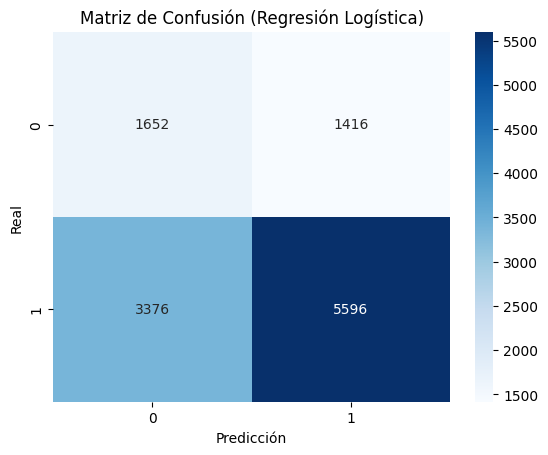

In [ ]:
# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ajustar el modelo de Regresión Logística con los mejores hiperparámetros
mejores_hiperparametros_lr = {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
modelo_lr = LogisticRegression(**mejores_hiperparametros_lr, class_weight='balanced', random_state=42)
modelo_lr.fit(X_train, y_train)

# 4. Evaluar en el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test)

# Métricas para Regresión Logística
print("\n🔹 Resultados Finales (Regresión Logística) 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

# Matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (Regresión Logística)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Ajustar el modelo SVC con:
!!!!!!{$ {C: 1, kernel:\ 'rbf', gamma:\ 'scale'} $} !!!!!


🔹 Resultados Finales (SVC) 🔹
Accuracy: 0.6445
Precision: 0.6750
Recall: 0.6445
F1 Score: 0.6570


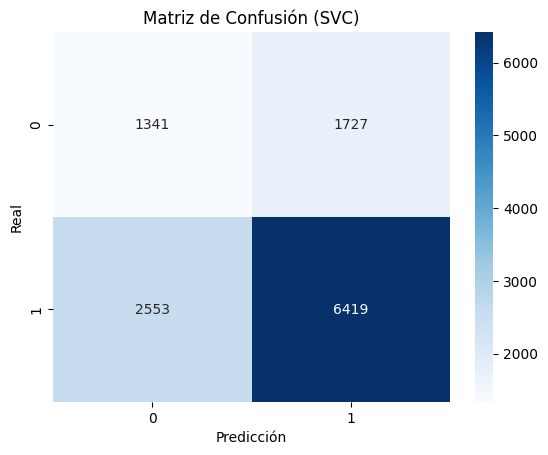

In [ ]:
# 1. Ajustar el modelo SVC con los mejores hiperparámetros
mejores_hiperparametros_svc = {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}
modelo_svc = SVC(**mejores_hiperparametros_svc, class_weight='balanced', random_state=42)
modelo_svc.fit(X_train, y_train)

# 2. Evaluar en el conjunto de prueba
y_pred_svc = modelo_svc.predict(X_test)

# Métricas para SVC
print("\n🔹 Resultados Finales (SVC) 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


🔹 Comparación de Modelos 🔹
Accuracy (Regresión Logística): 0.6020
Accuracy (SVC): 0.6445
Precision (Regresión Logística): 0.6784
Precision (SVC): 0.6750
Recall (Regresión Logística): 0.6020
Recall (SVC): 0.6445
F1 Score (Regresión Logística): 0.6258
F1 Score (SVC): 0.6570


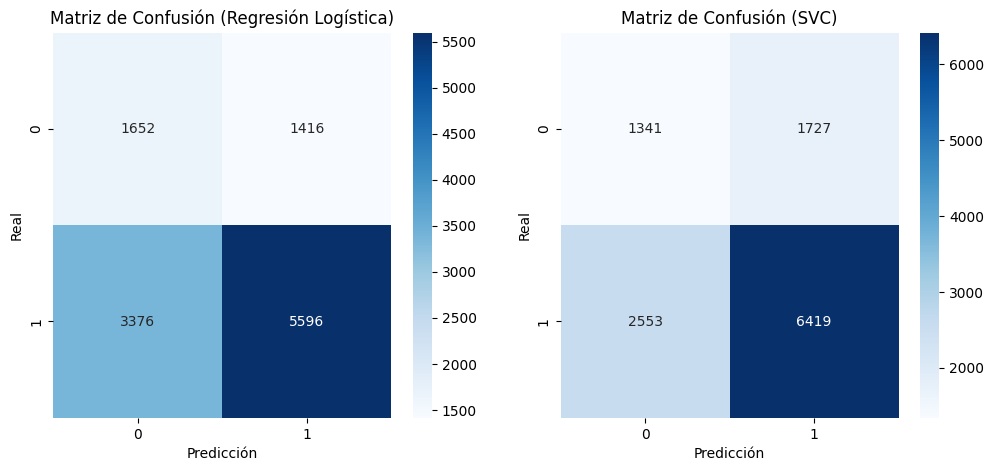

In [ ]:
# Comparar métricas de ambos modelos
print("\n🔹 Comparación de Modelos 🔹")
print(f"Accuracy (Regresión Logística): {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy (SVC): {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision (Regresión Logística): {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Precision (SVC): {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall (Regresión Logística): {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall (SVC): {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score (Regresión Logística): {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score (SVC): {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Comparar matrices de confusión
plt.figure(figsize=(12, 5))

# Matriz de confusión para Regresión Logística
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (Regresión Logística)")
plt.xlabel("Predicción")
plt.ylabel("Real")

# Matriz de confusión para SVC
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.show()

## Ajustar el modelo SVC con:
{$ {C: 0.1, kernel:\ 'poly', gamma:\ 'auto'} $}


🔹 Resultados Finales (SVC) 🔹
Accuracy: 0.6943
Precision: 0.6811
Recall: 0.6943
F1 Score: 0.6870


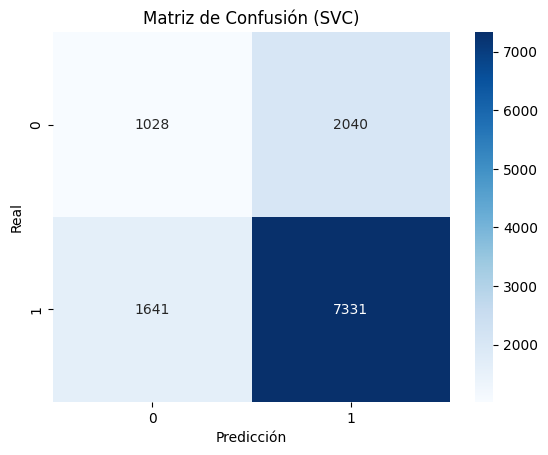

In [ ]:
# 1. Ajustar el modelo SVC con los mejores hiperparámetros
mejores_hiperparametros_svc = {'C': 0.1, 'kernel': 'poly', 'gamma': 'auto'}
modelo_svc = SVC(**mejores_hiperparametros_svc, class_weight='balanced', random_state=42)
modelo_svc.fit(X_train, y_train)

# 2. Evaluar en el conjunto de prueba
y_pred_svc = modelo_svc.predict(X_test)

# Métricas para SVC
print("\n🔹 Resultados Finales (SVC) 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Comparar métricas de ambos modelos


🔹 Comparación de Modelos 🔹
Accuracy (Regresión Logística): 0.6020
Accuracy (SVC): 0.6943
Precision (Regresión Logística): 0.6784
Precision (SVC): 0.6811
Recall (Regresión Logística): 0.6020
Recall (SVC): 0.6943
F1 Score (Regresión Logística): 0.6258
F1 Score (SVC): 0.6870


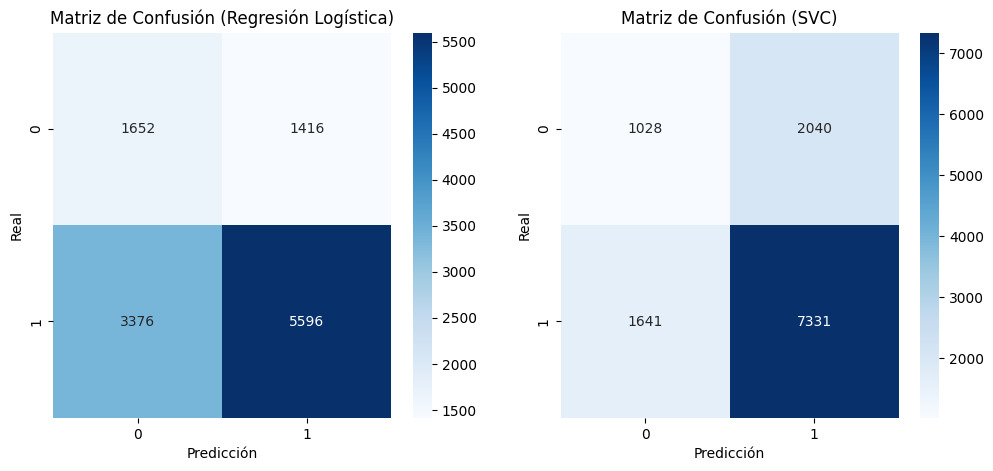

In [ ]:
# Comparar métricas de ambos modelos
print("\n🔹 Comparación de Modelos 🔹")
print(f"Accuracy (Regresión Logística): {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy (SVC): {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision (Regresión Logística): {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Precision (SVC): {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall (Regresión Logística): {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall (SVC): {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score (Regresión Logística): {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score (SVC): {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Comparar matrices de confusión
plt.figure(figsize=(12, 5))

# Matriz de confusión para Regresión Logística
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (Regresión Logística)")
plt.xlabel("Predicción")
plt.ylabel("Real")

# Matriz de confusión para SVC
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.show()

## Ajustar el modelo SVC con:
{$ {C: 0.01, kernel:\ 'poly', gamma:\ 'scale'} $}


🔹 Resultados Finales (SVC) 🔹
Accuracy: 0.7284
Precision: 0.6882
Recall: 0.7284
F1 Score: 0.6969


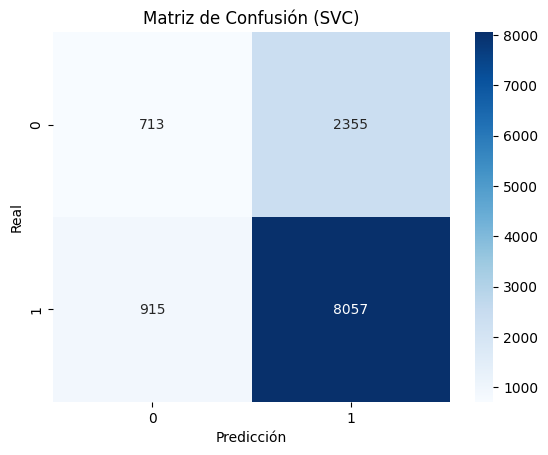

In [ ]:
# 1. Ajustar el modelo SVC con los mejores hiperparámetros
mejores_hiperparametros_svc = {'C': 0.01, 'kernel': 'poly', 'gamma': 'scale'}
modelo_svc = SVC(**mejores_hiperparametros_svc, class_weight='balanced', random_state=42)
modelo_svc.fit(X_train, y_train)

# 2. Evaluar en el conjunto de prueba
y_pred_svc = modelo_svc.predict(X_test)

# Métricas para SVC
print("\n🔹 Resultados Finales (SVC) 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Comparar métricas de ambos modelos


🔹 Comparación de Modelos 🔹
Accuracy (Regresión Logística): 0.6020
Accuracy (SVC): 0.7284
Precision (Regresión Logística): 0.6784
Precision (SVC): 0.6882
Recall (Regresión Logística): 0.6020
Recall (SVC): 0.7284
F1 Score (Regresión Logística): 0.6258
F1 Score (SVC): 0.6969


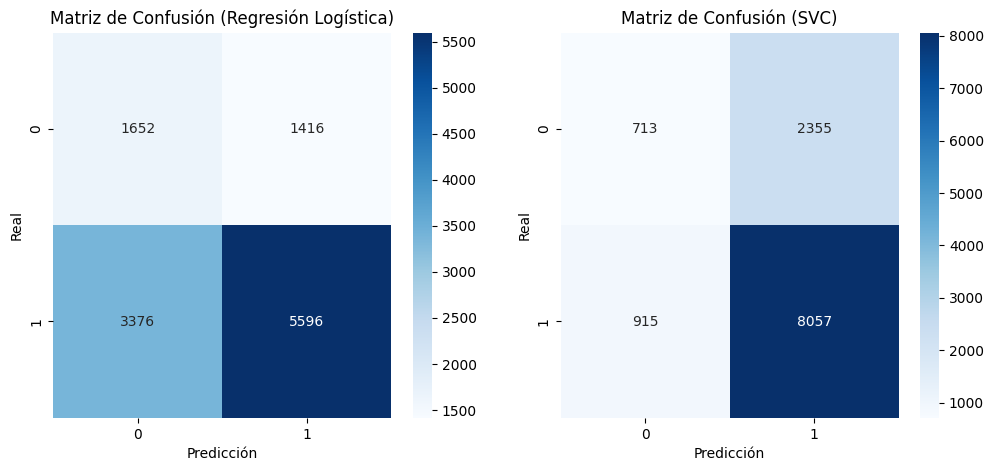

In [ ]:
# Comparar métricas de ambos modelos
print("\n🔹 Comparación de Modelos 🔹")
print(f"Accuracy (Regresión Logística): {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy (SVC): {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision (Regresión Logística): {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Precision (SVC): {precision_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"Recall (Regresión Logística): {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall (SVC): {recall_score(y_test, y_pred_svc, average='weighted'):.4f}")
print(f"F1 Score (Regresión Logística): {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score (SVC): {f1_score(y_test, y_pred_svc, average='weighted'):.4f}")

# Comparar matrices de confusión
plt.figure(figsize=(12, 5))

# Matriz de confusión para Regresión Logística
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (Regresión Logística)")
plt.xlabel("Predicción")
plt.ylabel("Real")

# Matriz de confusión para SVC
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (SVC)")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.show()

##Usando SGDC

https://colab.research.google.com/drive/1JCp04w1UxXrbf5-vp9O5JK56FLnQJsE-?usp=sharing

##  **Comparación: SGDClassifier vs. Regresión Logística vs. SVC**
Ahora que tenemos los resultados de los tres modelos, hagamos una comparación detallada:

| **Modelo**               | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|--------------------------|-------------|--------------|------------|--------------|
| **SGDClassifier (SVM Lineal)**  | **0.74**     | **0.69**     | **0.74**   | **0.69**     |
| **Regresión Logística**  | **0.60**     | **0.68**     | **0.60**   | **0.63**     |
| **SVC (RBF Kernel)**     | **0.64**     | **0.68**     | **0.64**   | **0.66**     |

---

##  **Análisis de Resultados**
1. **SGDClassifier (SVM Lineal) es el mejor en todas las métricas.**
   - **Mayor Accuracy (0.74 vs. 0.64 de SVC y 0.60 de Regresión Logística).**
   - **Mayor Recall (0.74), lo que indica que detecta mejor los positivos.**
   - **Mayor F1-score (0.69), indicando buen balance entre precisión y recall.**

2. **SVC con kernel RBF mejora frente a Regresión Logística, pero no supera a SGDClassifier.**
   - **Accuracy de 0.6445**, mejor que la regresión logística (0.60), pero menor que el SVM lineal (0.74).
   - **F1-score de 0.6570**, también mejor que la regresión logística (0.63), pero menor que SGDClassifier (0.69).

3. **Regresión Logística es el modelo más débil.**
   - **Menor Accuracy (0.60).**
   - **Peor Recall (0.60), lo que significa que no detecta tantos casos positivos.**

---


